# U.S. Medical Insurance Costs

## Introduction

## Data Preparation

In [112]:
# All of our import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Read our insurance data into a data frame
insurance_df = pd.read_csv('insurance.csv')
insurance_df['bmi'] = insurance_df['bmi'].round(2)
insurance_df['charges'] = insurance_df['charges'].round(2)

# Print a sample of our insurance data
print(insurance_df.head())

   age     sex    bmi  children smoker     region   charges
0   19  female  27.90         0    yes  southwest  16884.92
1   18    male  33.77         1     no  southeast   1725.55
2   28    male  33.00         3     no  southeast   4449.46
3   33    male  22.70         0     no  northwest  21984.47
4   32    male  28.88         0     no  northwest   3866.86


## Feature Analysis

### Age

#### Age Distribution Across Regions in Our Data

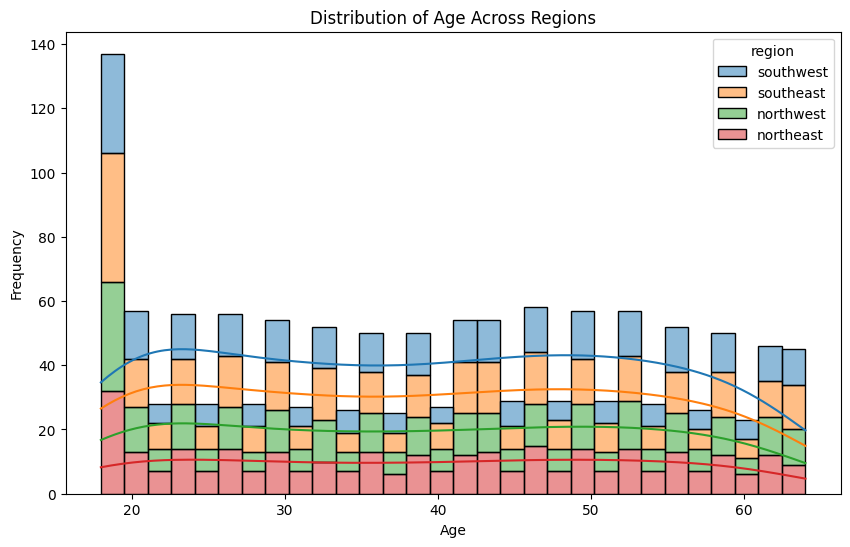

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df, x='age', bins=30, kde=True, hue='region', multiple='stack')
plt.title('Distribution of Age Across Regions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Average and Median Age in Our Data

In [115]:
# Calculates and returns the average age as a float value from the provided dataframe
def find_average_age(data):
    return data['age'].mean()

def find_median_age(data):
    return data['age'].median()

In [116]:
average_age = find_average_age(insurance_df)
median_age = find_median_age(insurance_df)
print(f"In our dataset, the average age is {average_age} while the median age is {median_age}")

In our dataset, the average age is 39.20702541106129 while the median age is 39.0


#### Relationship between Age and Smoking Behavior

In [117]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90+']
insurance_df['age_group'] = pd.cut(insurance_df['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of smokers and non-smokers for each age group
age_group_smoking_percentage = insurance_df.groupby(['age_group', 'smoker']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
age_group_smoking_percentage['no'] = (age_group_smoking_percentage['no']*100).round(2)
age_group_smoking_percentage['yes'] = (age_group_smoking_percentage['yes']*100).round(2)

# Print the resulting dataframe
print(age_group_smoking_percentage)

smoker        no    yes
age_group              
<20        78.10  21.90
20s        80.00  20.00
30s        77.43  22.57
40s        77.78  22.22
50s        84.87  15.13
60s        76.32  23.68
70s          NaN    NaN
80s          NaN    NaN
90+          NaN    NaN


/tmp/ipykernel_1712/226189435.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_smoking_percentage = insurance_df.groupby(['age_group', 'smoker']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)


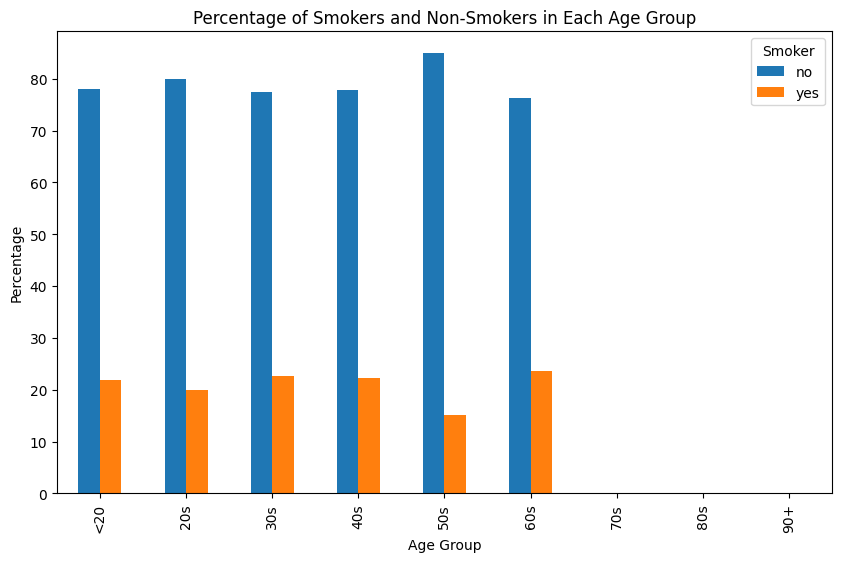

In [118]:
age_group_smoking_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Smokers and Non-Smokers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Smoker')
plt.show()

#### Impact of Age on BMI
<p><b>Note:</b> BMI is not necessarily an accurate predictor of health due to it reducing complex phenomena to a single number. Insurance companies use this BMI in their calculations, hence why we will use it in parts of our analysis, but would like to be clear of the skepticism around its relevance to our data and findings</p>

##### Distribution of BMI Across Age Groups

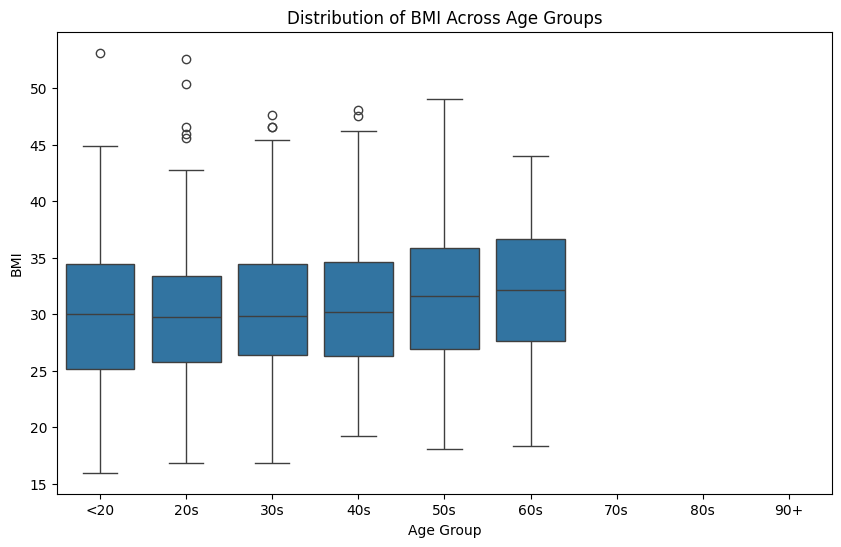

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=insurance_df)
plt.title('Distribution of BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()

### Geographical

##### Distribution of Data by Region

In [120]:
region_percentage = insurance_df['region'].value_counts(normalize=True).reset_index()
region_percentage.columns = ['region', 'percentage']
print(region_percentage)

      region  percentage
0  southeast    0.272048
1  southwest    0.242900
2  northwest    0.242900
3  northeast    0.242152


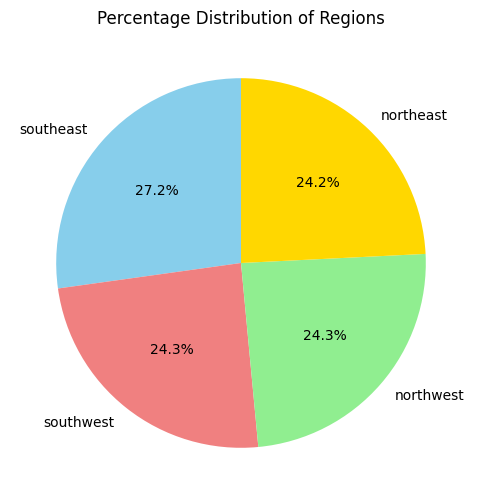

In [121]:
plt.figure(figsize=(6, 6))
plt.pie(region_percentage['percentage'], labels=region_percentage['region'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Percentage Distribution of Regions')
plt.show()

##### Average Insurance Cost Across Regions

In [122]:
average_cost_across_regions = insurance_df.groupby('region')['charges'].mean().reset_index()
average_cost_across_regions['Average Cost'] = average_cost_across_regions['charges'].round(2)
average_cost_across_regions = average_cost_across_regions[['region', 'Average Cost']]
print(average_cost_across_regions)

      region  Average Cost
0  northeast      13406.38
1  northwest      12417.58
2  southeast      14735.41
3  southwest      12346.94


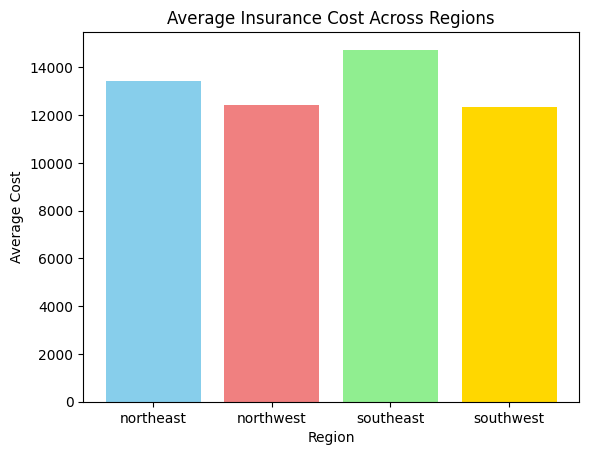

In [123]:
plt.bar(average_cost_across_regions['region'], average_cost_across_regions['Average Cost'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Region')
plt.ylabel('Average Cost')
plt.title('Average Insurance Cost Across Regions')
plt.show()

### Smokers vs. Non-Smokers

##### Percentage of Smokers and Non-Smokers

In [124]:
smoker_percentage = insurance_df['smoker'].value_counts(normalize=True).reset_index()
smoker_percentage.columns = ['smoker', 'percentage']
smoker_percentage['percentage'] = (smoker_percentage['percentage'] * 100).round(2)
print(smoker_percentage)

  smoker  percentage
0     no       79.52
1    yes       20.48


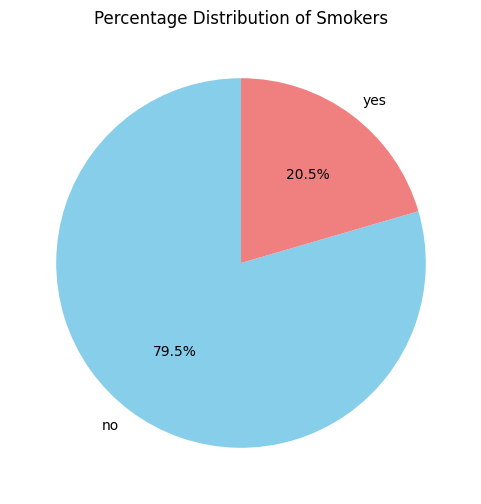

In [125]:
plt.figure(figsize=(6, 6))
plt.pie(smoker_percentage['percentage'], labels=smoker_percentage['smoker'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Smokers')
plt.show()

##### Relationship Between Smoking and BMI

In [126]:
mean_bmi_smoker = insurance_df[insurance_df['smoker'] == 'yes']['bmi'].mean()
mean_bmi_non_smoker = insurance_df[insurance_df['smoker'] == 'no']['bmi'].mean()
correlation = insurance_df[['bmi', 'smoker']].replace({'yes': 1, 'no': 0}).corr().iloc[0, 1]

print(f"Mean BMI for Smokers: {mean_bmi_smoker:.2f}")
print(f"Mean BMI for Non-Smokers: {mean_bmi_non_smoker:.2f}")
print(f"Correlation between BMI and Smoking: {correlation:.2f}")

Mean BMI for Smokers: 30.71
Mean BMI for Non-Smokers: 30.65
Correlation between BMI and Smoking: 0.00


### Parents vs. Non-Parents

##### Average Amount of Children per Person

In [127]:
average_amount_children = insurance_df['children'].mean().round(2)
print(average_amount_children)

1.09


##### Distribution of Parents vs. Non-Parents

In [128]:
# Helper function for determining whether or not someone in our data is a parent during selection
def categorize_parental_status(num_children):
    if num_children > 0:
        return 'Parent'
    else:
        return 'Non-Parent'
    
new_df = insurance_df.assign(parental_status=insurance_df['children'].apply(categorize_parental_status))
parental_percentage = new_df['parental_status'].value_counts(normalize=True).reset_index()
parental_percentage.columns = ['parental_status', 'percentage']
parental_percentage['percentage'] = (parental_percentage['percentage'] * 100).round(2)

print(parental_percentage)

  parental_status  percentage
0          Parent        57.1
1      Non-Parent        42.9


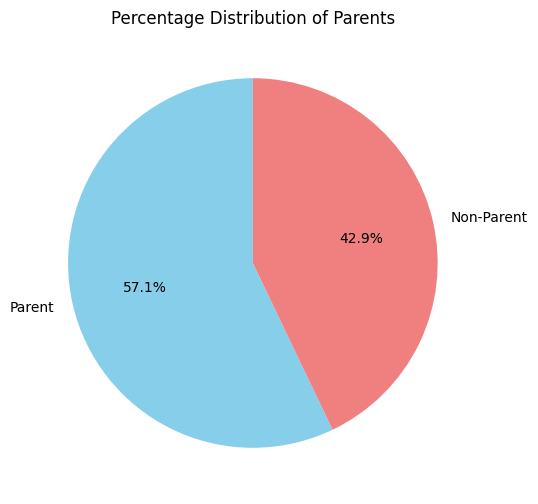

In [129]:
plt.figure(figsize=(6, 6))
plt.pie(parental_percentage['percentage'], labels=parental_percentage['parental_status'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage Distribution of Parents')
plt.show()

##### Parental Age Distribution

In [130]:
parental_age = new_df.groupby('age_group')['parental_status'].count().reset_index()
parental_age.columns = ['age_group', 'total_parents']
print(parental_age)

  age_group  total_parents
0       <20            137
1       20s            280
2       30s            257
3       40s            279
4       50s            271
5       60s            114
6       70s              0
7       80s              0
8       90+              0


/tmp/ipykernel_1712/1990290431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parental_age = new_df.groupby('age_group')['parental_status'].count().reset_index()


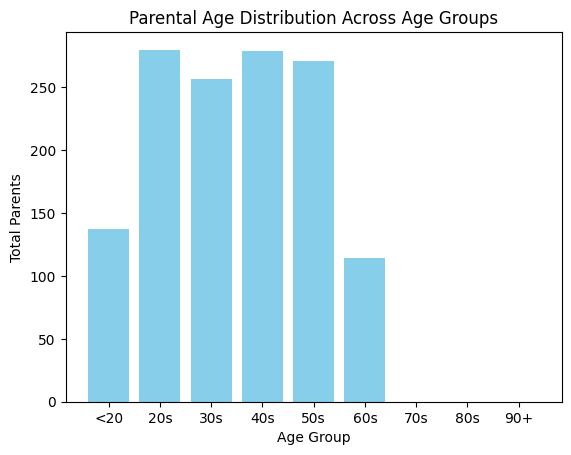

In [131]:
plt.bar(parental_age['age_group'], parental_age['total_parents'], color='skyblue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Parents')
plt.title('Parental Age Distribution Across Age Groups')

# Show the plot
plt.show()

##### Relationship Between Parenthood and Smoking Habits

In [132]:
parent_smoking_relationship = pd.crosstab(new_df['parental_status'], new_df['smoker'])
print(parent_smoking_relationship)

smoker            no  yes
parental_status          
Non-Parent       459  115
Parent           605  159


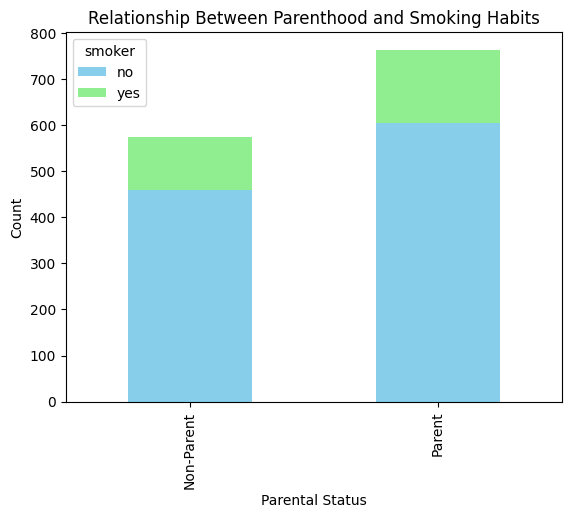

In [133]:
parent_smoking_relationship.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Parental Status')
plt.ylabel('Count')
plt.title('Relationship Between Parenthood and Smoking Habits')

# Show the plot
plt.show()

### BMI

##### BMI Average Across Age Groups

In [134]:
# Calculate the average BMI for each age group
average_bmi_by_age_group = insurance_df.groupby('age_group')['bmi'].mean().round(2).reset_index()

# Print the resulting DataFrame
print(average_bmi_by_age_group)

  age_group    bmi
0       <20  29.97
1       20s  29.79
2       30s  30.44
3       40s  30.71
4       50s  31.51
5       60s  32.02
6       70s    NaN
7       80s    NaN
8       90+    NaN


/tmp/ipykernel_1712/1107913265.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi_by_age_group = insurance_df.groupby('age_group')['bmi'].mean().round(2).reset_index()


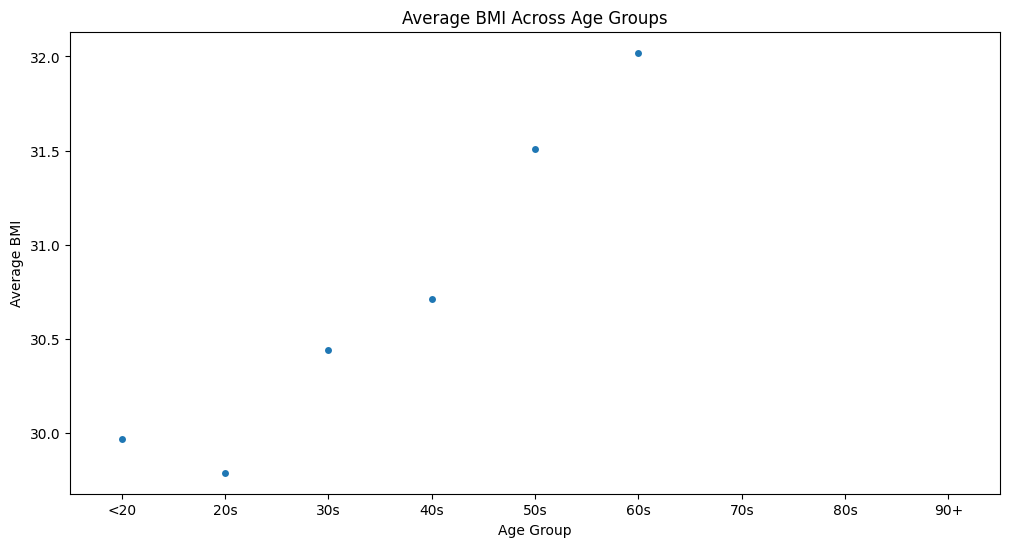

In [135]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='age_group', y='bmi', data=average_bmi_by_age_group, size=5)
plt.title('Average BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()

### Gender
<p><b>Note:</b> Our provided insurance dataset does not take into account trans and non-binary individuals, which should be kept in mind while viewing the data and drawing conclusions.</p>

##### Gender Distribution in our Data

In [136]:
gender_distribution = insurance_df.groupby('sex').size().reset_index(name='total')
gender_distribution['percentage'] = ((gender_distribution['total'] / gender_distribution['total'].sum()) * 100).round(2)

print(gender_distribution)

      sex  total  percentage
0  female    662       49.48
1    male    676       50.52


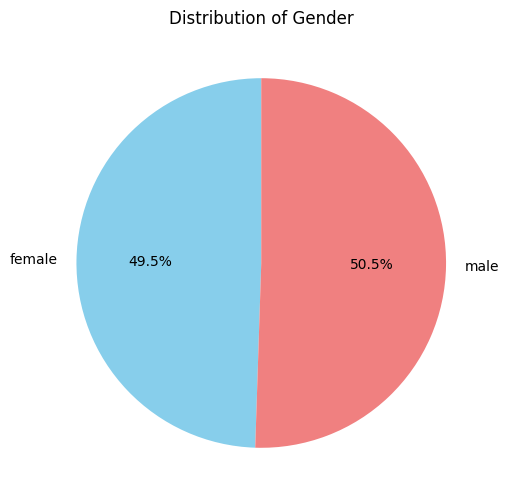

In [137]:
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution['percentage'], labels=gender_distribution['sex'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()

##### Relationship Between Gender and BMI

In [138]:
gender_bmi_relationship = insurance_df.groupby('sex')['bmi'].mean().round(2).reset_index()

print(gender_bmi_relationship)

      sex    bmi
0  female  30.38
1    male  30.94


## Insurance Cost Analysis

##### Insurance Cost Range in our Data

In [139]:
min_cost = insurance_df['charges'].min()
average_cost = insurance_df['charges'].mean().round(2)
median_cost = insurance_df['charges'].median().round(2)
max_cost = insurance_df['charges'].max().round(2)
print(f"In our dataset:\nThe lowest insurance cost is {min_cost} dollars\nThe average cost is {average_cost} dollars\nThe median cost is {median_cost} dollars\nThe highest cost is {max_cost} dollars")

In our dataset:
The lowest insurance cost is 1121.87 dollars
The average cost is 13270.42 dollars
The median cost is 9382.03 dollars
The highest cost is 63770.43 dollars


##### Relationship Between Age and Insurance Cost

In [140]:
cost_by_age_group = insurance_df.groupby("age_group")["charges"].mean().round(2).reset_index()
cost_by_age_group.columns = ['age_group', 'average_cost']
print(cost_by_age_group)

  age_group  average_cost
0       <20       8407.35
1       20s       9561.75
2       30s      11738.78
3       40s      14399.20
4       50s      16495.23
5       60s      21248.02
6       70s           NaN
7       80s           NaN
8       90+           NaN


/tmp/ipykernel_1712/162888270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_by_age_group = insurance_df.groupby("age_group")["charges"].mean().round(2).reset_index()


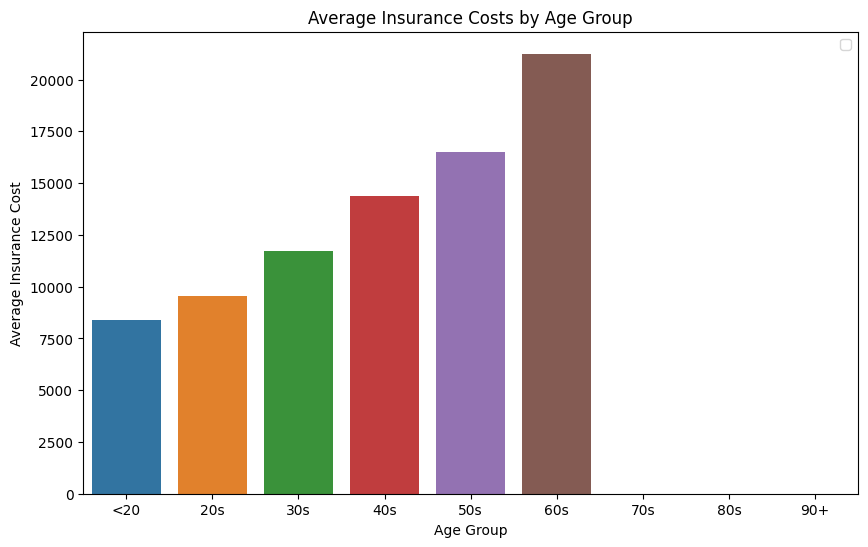

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='average_cost', data=cost_by_age_group, hue='age_group', dodge=False)
plt.title('Average Insurance Costs by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Insurance Cost')
plt.legend([])
plt.show()

##### Relationship Between Geographical Location and Insurance Cost

In [142]:
cost_by_region = insurance_df.groupby("region")["charges"].mean().round(2).reset_index()
cost_by_region.columns = ['region', 'average_cost']
print(cost_by_region)

      region  average_cost
0  northeast      13406.38
1  northwest      12417.58
2  southeast      14735.41
3  southwest      12346.94


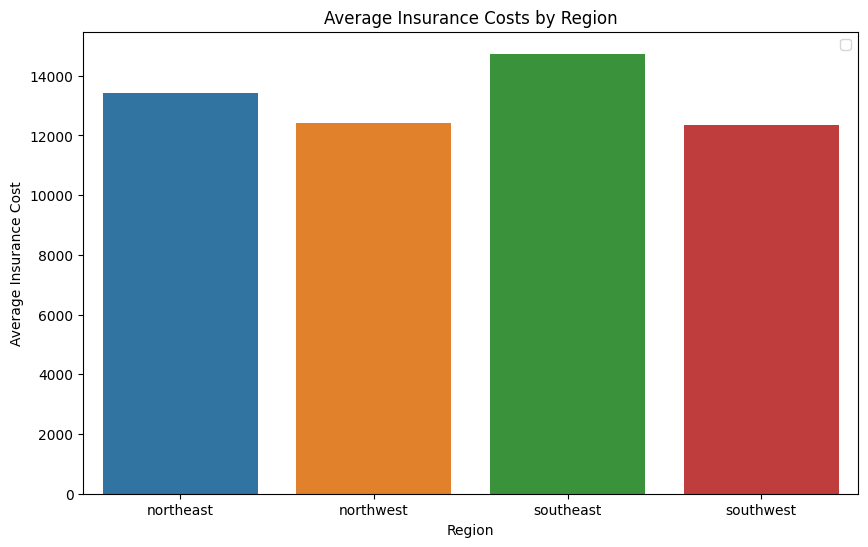

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='average_cost', data=cost_by_region, hue='region', dodge=False)
plt.title('Average Insurance Costs by Region')
plt.xlabel('Region')
plt.ylabel('Average Insurance Cost')
plt.legend([])
plt.show()

##### Relationship Between Smoking and Insurance Cost

In [144]:
cost_by_smoking_status = insurance_df.groupby('smoker')['charges'].mean().round(2).reset_index()
cost_by_smoking_status.columns = ['smoking_status', 'average_cost']
print(cost_by_smoking_status)

  smoking_status  average_cost
0             no       8434.27
1            yes      32050.23


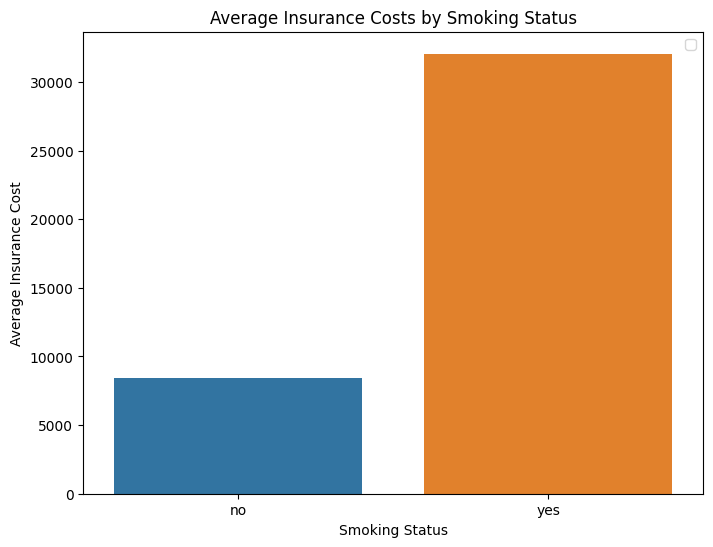

In [145]:
plt.figure(figsize=(8, 6))
sns.barplot(x='smoking_status', y='average_cost', data=cost_by_smoking_status, hue='smoking_status')
plt.title('Average Insurance Costs by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Insurance Cost')
plt.legend([])
plt.show()

##### Relationship Between Having Children and Insurance Cost

In [146]:
cost_by_child = insurance_df.groupby("children")['charges'].mean().round().reset_index()
cost_by_child.columns = ['amount_of_children', 'average_cost']
print(cost_by_child)

   amount_of_children  average_cost
0                   0       12366.0
1                   1       12731.0
2                   2       15074.0
3                   3       15355.0
4                   4       13851.0
5                   5        8786.0


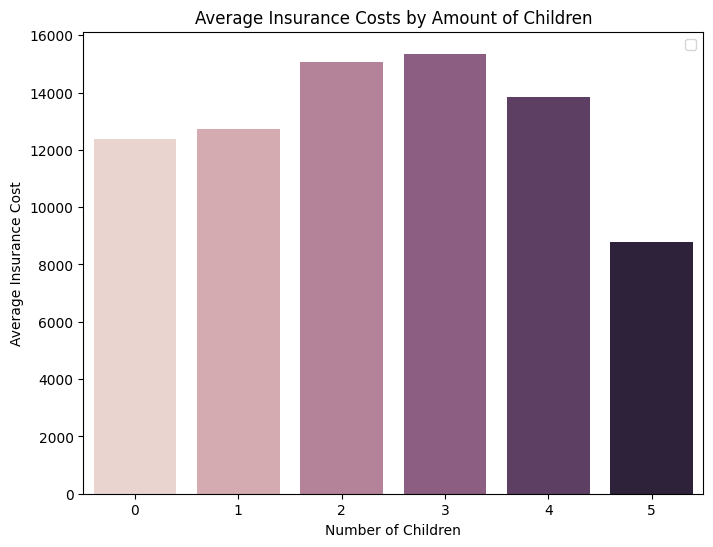

In [147]:
plt.figure(figsize=(8, 6))
sns.barplot(x='amount_of_children', y='average_cost', data=cost_by_child, hue='amount_of_children')
plt.title('Average Insurance Costs by Amount of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Insurance Cost')
plt.legend([])
plt.show()

##### Relationship Between BMI and Insurance Cost

In [148]:
# Categorize BMI into groups (e.g., underweight, normal weight, overweight, obese)
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
insurance_df['bmi_group'] = pd.cut(insurance_df['bmi'], bins=bins, labels=labels)

# Calculate the average insurance cost for each BMI group
cost_by_bmi_group = insurance_df.groupby('bmi_group')['charges'].mean().round(2).reset_index()
cost_by_bmi_group.columns = ['bmi_group', 'average_cost']
print(cost_by_bmi_group)

       bmi_group  average_cost
0    Underweight       8657.62
1  Normal Weight      10435.44
2     Overweight      10997.80
3        Obese I      14429.42
4       Obese II      17022.26
5      Obese III      16784.62


/tmp/ipykernel_1712/1573129516.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_by_bmi_group = insurance_df.groupby('bmi_group')['charges'].mean().round(2).reset_index()


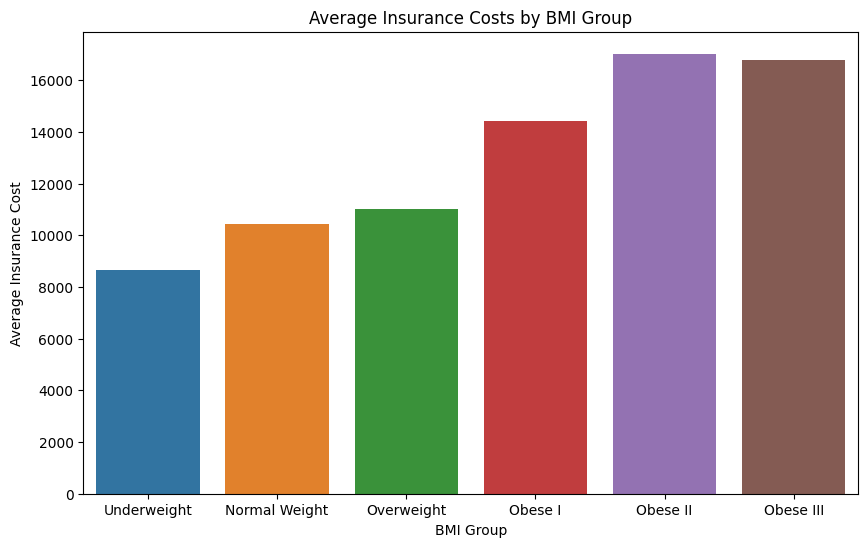

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_group', y='average_cost', data=cost_by_bmi_group, order=labels, hue='bmi_group')
plt.title('Average Insurance Costs by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Average Insurance Cost')
plt.show()

##### Relationship Between Gender and Insurance Cost

In [150]:
cost_by_gender = insurance_df.groupby('sex')['charges'].mean().round(2).reset_index()
cost_by_gender.columns = ['gender', 'average_cost']
print(cost_by_gender)

   gender  average_cost
0  female      12569.58
1    male      13956.75


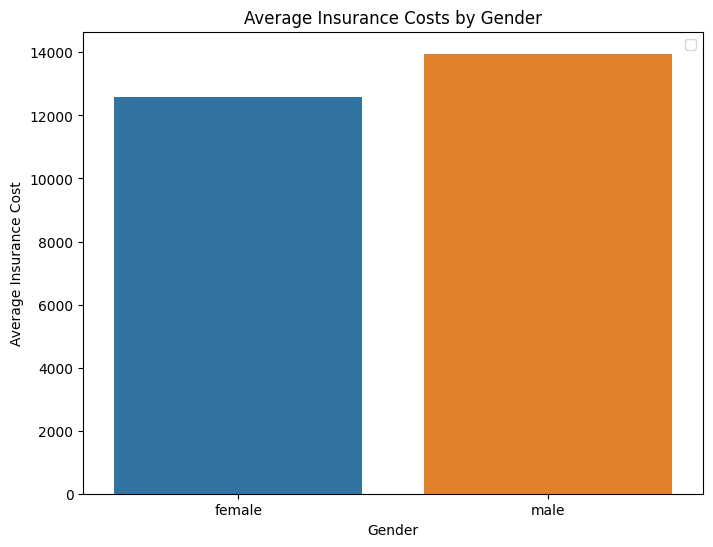

In [151]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='average_cost', data=cost_by_gender, hue='gender')
plt.title('Average Insurance Costs by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Insurance Cost')
plt.legend([])
plt.show()